Step 1: Run in the terminal "pip install kaggle"  
Step 2: Activate kaggle API token in Account tab  
Step 3: Get kaggle.json file -> save to C:/Users/jtrum/.kaggle  
Step 4: Run in the terminal "kaggle datasets download -d kmader/satellite-images-of-hurricane-damage  
Step 5: Run code chunk below -> specify pathway where it says ("~/datasets/")  

In [1]:
import os
import zipfile

with zipfile.ZipFile("satellite-images-of-hurricane-damage.zip", "r") as zip_ref:
    zip_ref.extractall(os.path.expanduser("C:/Users/jtrum/pennmusa/MUSA6500/final_proj_data"))

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import keras as keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

Training data (5000 of each class)

In [2]:
#Since the channels are 3, we can use keras to import into a dataset.
train_path = 'C:/Users/jtrum/pennmusa/MUSA6500/final_proj_data/train_another'

#Use Keras to import data
train_dataset = keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
train_dataset = train_dataset.unbatch()
train_X = np.asarray(list(train_dataset.map(lambda x, y: x)))
train_y = np.asarray(list(train_dataset.map(lambda x, y: y)))

Found 10000 files belonging to 2 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Validation data (1000 of each class)

In [3]:
#Since the channels are 3, we can use keras to import into a dataset.
val_path = 'C:/Users/jtrum/pennmusa/MUSA6500/final_proj_data/validation_another'

#Use Keras to import data
val_dataset = keras.utils.image_dataset_from_directory(
    val_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
val_dataset = val_dataset.unbatch()
val_X = np.asarray(list(val_dataset.map(lambda x, y: x)))
val_y = np.asarray(list(val_dataset.map(lambda x, y: y)))

Found 2000 files belonging to 2 classes.


Test dataset (1000 of each class)

In [4]:
#Since the channels are 3, we can use keras to import into a dataset.
test_path = 'C:/Users/jtrum/pennmusa/MUSA6500/final_proj_data/test'

#Use Keras to import data
test_dataset = keras.utils.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
test_dataset = test_dataset.unbatch()
test_X = np.asarray(list(test_dataset.map(lambda x, y: x)))
test_y = np.asarray(list(test_dataset.map(lambda x, y: y)))

Found 2000 files belonging to 2 classes.


In [31]:
test_y

array([1, 1, 1, ..., 0, 0, 0])

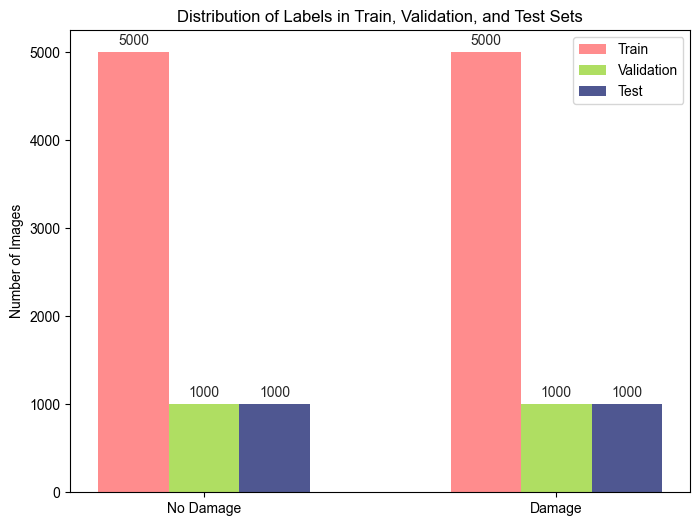

In [5]:
import matplotlib.pyplot as plt

# Define the labels
labels = ['No Damage', 'Damage']

# Count the number of labels in each array
train_counts = [sum(train_y==0), sum(train_y==1)]
val_counts = [sum(val_y==0), sum(val_y==1)]
test_counts = [sum(test_y==0), sum(test_y==1)]

# Create a barplot
fig, ax = plt.subplots(figsize=(8,6))
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax.bar(x - width, train_counts, width, label='Train', color='#FF8C8DFF')
rects2 = ax.bar(x, val_counts, width, label='Validation', color='#AFDE62FF')
rects3 = ax.bar(x + width, test_counts, width, label='Test', color='#4F5791FF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Labels in Train, Validation, and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
sns.set_style("ticks")

# Add counts above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


U-NET

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

def unet(input_size=(128, 128, 3)):
    inputs = keras.Input(shape=input_size)

    # down sampling
    conv1 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(32, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(64, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # bottom of u net architecture
    conv5 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    # up sampling
    up6 = layers.Conv2D(256, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([conv4, up6], axis=3)
    conv6 = layers.Conv2D(256, 3, activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2D(128, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(128, 3, activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv7)

    up8 = layers.Conv2D(64, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(64, 3, activation='relu', padding='same')(merge8)
    conv8 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv8)

    up9 = layers.Conv2D(32, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same')(merge9)
    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same')(conv9)
    conv9 = layers.Conv2D(2, 3, activation='relu', padding='same')(conv9)

    outputs = layers.Conv2D(1, activation='sigmoid')(conv9)

    model = keras.Model(inputs, outputs)
    return model


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(128, 128), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_path, target_size=(128, 128), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(128, 128), batch_size=32, class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
model = unet()

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=val_generator)

test_loss, test_acc = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

TypeError: __init__() missing 1 required positional argument: 'kernel_size'